In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import numpy as np

import os

In [2]:
# Path to the CSV file
current_directory = os.getcwd()
file_path = os.path.join(current_directory, "archives", "PDMX.csv")
df = pd.read_csv(file_path)

Having loaded the CSV, we perform a little analysis of the dataset.

In [3]:
df.head()

,path,metadata,mxl,pdf,version,is_user_pro,is_user_publisher,is_user_staff,has_paywall,is_rated,...,best_arrangement,is_best_arrangement,best_unique_arrangement,is_best_unique_arrangement,subset:all,subset:rated,subset:deduplicated,subset:rated_deduplicated,subset:no_license_conflict,subset:valid_mxl_pdf
0,./data/1/11/QmbbGKtZ9G6DkWxvSeU516c1ktWiFJmEbH...,./metadata/5/5740212.json,./mxl/1/11/QmbbGKtZ9G6DkWxvSeU516c1ktWiFJmEbHG...,./pdf/1/11/QmbbGKtZ9G6DkWxvSeU516c1ktWiFJmEbHG...,3.01,True,False,False,False,True,...,./data/1/11/QmbbGKtZ9G6DkWxvSeU516c1ktWiFJmEbH...,True,./data/1/11/QmbbGKtZ9G6DkWxvSeU516c1ktWiFJmEbH...,True,True,True,True,True,False,True
1,./data/1/11/QmbbWCwo3rhaJ2wKL6H7aQPX9D6HfQxLZK...,./metadata/2/5736259.json,./mxl/1/11/QmbbWCwo3rhaJ2wKL6H7aQPX9D6HfQxLZKP...,./pdf/1/11/QmbbWCwo3rhaJ2wKL6H7aQPX9D6HfQxLZKP...,3.01,True,False,False,False,False,...,./data/4/20/QmeFmHKn3UF4o56vThLV4kwXhpTNDd9gH9...,False,./data/4/20/QmeFmHKn3UF4o56vThLV4kwXhpTNDd9gH9...,False,True,False,False,False,False,True
2,./data/1/11/QmbbhLwwmuKqA9MC1ULhojEMGxnxDobsZP...,./metadata/1/4571401.json,./mxl/1/11/QmbbhLwwmuKqA9MC1ULhojEMGxnxDobsZPJ...,./pdf/1/11/QmbbhLwwmuKqA9MC1ULhojEMGxnxDobsZPJ...,3.01,True,False,False,False,False,...,./data/0/9/QmaahMHX51JmiE3LZUbdFpvTTuMdiV8Uvmv...,False,./data/0/9/QmaahMHX51JmiE3LZUbdFpvTTuMdiV8Uvmv...,False,True,False,False,False,True,True
3,./data/1/11/Qmbbh58jD1ZLT1vevNsnyEZkexnx2USTFz...,./metadata/6/4694088.json,./mxl/1/11/Qmbbh58jD1ZLT1vevNsnyEZkexnx2USTFz6...,./pdf/1/11/Qmbbh58jD1ZLT1vevNsnyEZkexnx2USTFz6...,3.01,True,False,False,False,False,...,./data/13/1/QmV2RMMZuHxhgQqEUV98FpFGJ5mPuDVSXy...,False,./data/13/1/QmV2RMMZuHxhgQqEUV98FpFGJ5mPuDVSXy...,False,True,False,False,False,True,True
4,./data/1/11/Qmbbmnu3Eg81nQ3WHnBFrAj5gsr3D13ysS...,./metadata/4/4808199.json,./mxl/1/11/Qmbbmnu3Eg81nQ3WHnBFrAj5gsr3D13ysSQ...,./pdf/1/11/Qmbbmnu3Eg81nQ3WHnBFrAj5gsr3D13ysSQ...,3.01,True,False,False,False,False,...,./data/5/4/Qmf5QQhwvkXMmNtjG8ydfNRFq5yBDvhQbfQ...,False,./data/5/4/Qmf5QQhwvkXMmNtjG8ydfNRFq5yBDvhQbfQ...,False,True,False,False,False,True,True


In [4]:
df.columns

Index(['path', 'metadata', 'mxl', 'pdf', 'version', 'is_user_pro',
       'is_user_publisher', 'is_user_staff', 'has_paywall', 'is_rated',
       'is_official', 'is_original', 'is_draft', 'has_custom_audio',
       'has_custom_video', 'n_comments', 'n_favorites', 'n_views', 'n_ratings',
       'rating', 'license', 'license_url', 'license_conflict', 'genres',
       'groups', 'tags', 'song_name', 'title', 'subtitle', 'artist_name',
       'composer_name', 'publisher', 'complexity', 'n_tracks', 'tracks',
       'song_length', 'song_length.seconds', 'song_length.bars',
       'song_length.beats', 'n_notes', 'notes_per_bar', 'n_annotations',
       'has_annotations', 'n_lyrics', 'has_lyrics', 'n_tokens',
       'pitch_class_entropy', 'scale_consistency', 'groove_consistency',
       'best_path', 'is_best_path', 'best_arrangement', 'is_best_arrangement',
       'best_unique_arrangement', 'is_best_unique_arrangement', 'subset:all',
       'subset:rated', 'subset:deduplicated', 'subset:rated_

In [5]:
n_songs = len(df)
n_unlabeled = df['genres'].isnull().sum()

print("Number of songs in the dataset: ", n_songs)
print("Number of songs without genre: ",  n_unlabeled)
print("Number of labelled songs: ",  n_songs - n_unlabeled)

Number of songs in the dataset:  254077
Number of songs without genre:  171276
Number of labelled songs:  82801


We now count and visualise the distribution of genres in the dataset.

             Genre   Count
1              nan  171276
0        classical   64586
3             folk   11076
5       soundtrack    3461
4             rock    1668
7              pop    1544
8             jazz     647
12      electronic     581
11      rbfunksoul     494
2   religiousmusic     460
6       worldmusic     337
10          hiphop     220
16           metal     149
9     experimental     126
15         country     122
14          newage      59
17          comedy      43
13           disco      39
19       reggaeska      18
18           blues      16
20        darkwave       3


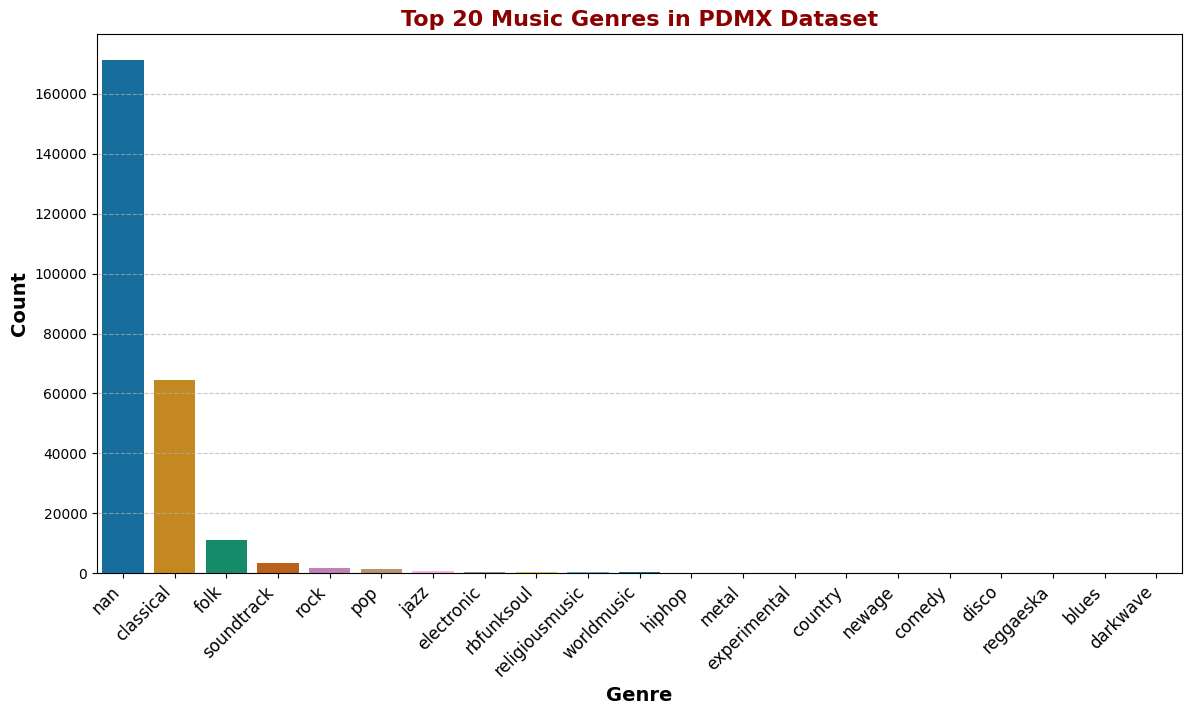

In [6]:
# Convert genres to string and split for multi-label instances
df['genres'] = df['genres'].astype(str)  
genre_series = df['genres'].str.split('-')  

# Flatten the list of genres and count occurrences
all_genres = [genre.strip() for sublist in genre_series for genre in sublist]
genre_counts = Counter(all_genres)

# DataFrame for visualization
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
print(genre_df)

plt.figure(figsize=(14, 7))
sns.barplot(x=genre_df['Genre'][:21], y=genre_df['Count'][:21], hue=genre_df['Genre'][:21], legend="auto", palette="colorblind")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.xlabel("Genre", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.title("Top 20 Music Genres in PDMX Dataset", fontsize=16, fontweight='bold', color='darkred')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Some rows (songs) have multiple genres associated to them, we count how many intances of those happen.

In [7]:
# Count multi-label instances (songs with more than one genre)
multi_label_instances = sum(1 for genres in genre_series if len(genres) > 1)
print(f"Number of multi-label instances (songs with multiple genres): {multi_label_instances}")

Number of multi-label instances (songs with multiple genres): 2727


In [8]:
# We convert any non-standard NaN representations to actual NaN
df['genres'] = df['genres'].replace(['nan', 'NaN', 'None', ''], np.nan)
df = df.dropna(subset=['genres'])

After the removal of Nan entries we plot the resulting distribution, log transformed in the y axis for better visualisation, due to the hihg class imbalance.

             Genre  Count
0        classical  64586
2             folk  11076
4       soundtrack   3461
3             rock   1668
6              pop   1544
7             jazz    647
11      electronic    581
10      rbfunksoul    494
1   religiousmusic    460
5       worldmusic    337
9           hiphop    220
15           metal    149
8     experimental    126
14         country    122
13          newage     59
16          comedy     43
12           disco     39
18       reggaeska     18
17           blues     16
19        darkwave      3


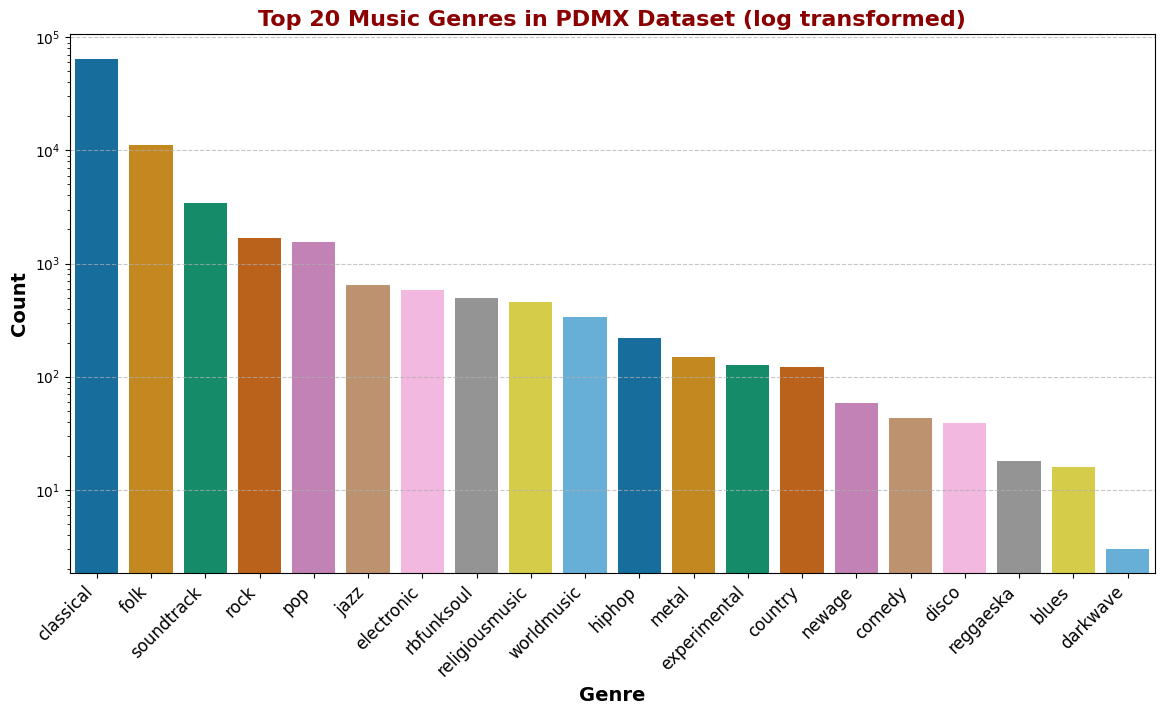

In [9]:
# Convert genres to string and split for multi-label instances
df['genres'] = df['genres'].astype(str)  
genre_series = df['genres'].str.split('-')  

# Flatten the list of genres and count occurrences
all_genres = [genre.strip() for sublist in genre_series for genre in sublist]
genre_counts = Counter(all_genres)

# DataFrame for visualization
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
print(genre_df)

plt.figure(figsize=(14, 7))
sns.barplot(x=genre_df['Genre'][:20], y=genre_df['Count'][:20], hue=genre_df['Genre'][:20], legend="auto", palette="colorblind")
plt.yscale("log")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.xlabel("Genre", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.title("Top 20 Music Genres in PDMX Dataset (log transformed)", fontsize=16, fontweight='bold', color='darkred')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Save CSV without nans for correct manipulation of the files.

In [10]:
df.to_csv('dataset.csv', index=False)  # Set index=False to avoid saving the index column

print("CSV file saved successfully!")

CSV file saved successfully!


In [11]:
df.head()

,path,metadata,mxl,pdf,version,is_user_pro,is_user_publisher,is_user_staff,has_paywall,is_rated,...,best_arrangement,is_best_arrangement,best_unique_arrangement,is_best_unique_arrangement,subset:all,subset:rated,subset:deduplicated,subset:rated_deduplicated,subset:no_license_conflict,subset:valid_mxl_pdf
0,./data/1/11/QmbbGKtZ9G6DkWxvSeU516c1ktWiFJmEbH...,./metadata/5/5740212.json,./mxl/1/11/QmbbGKtZ9G6DkWxvSeU516c1ktWiFJmEbHG...,./pdf/1/11/QmbbGKtZ9G6DkWxvSeU516c1ktWiFJmEbHG...,3.01,True,False,False,False,True,...,./data/1/11/QmbbGKtZ9G6DkWxvSeU516c1ktWiFJmEbH...,True,./data/1/11/QmbbGKtZ9G6DkWxvSeU516c1ktWiFJmEbH...,True,True,True,True,True,False,True
1,./data/1/11/QmbbWCwo3rhaJ2wKL6H7aQPX9D6HfQxLZK...,./metadata/2/5736259.json,./mxl/1/11/QmbbWCwo3rhaJ2wKL6H7aQPX9D6HfQxLZKP...,./pdf/1/11/QmbbWCwo3rhaJ2wKL6H7aQPX9D6HfQxLZKP...,3.01,True,False,False,False,False,...,./data/4/20/QmeFmHKn3UF4o56vThLV4kwXhpTNDd9gH9...,False,./data/4/20/QmeFmHKn3UF4o56vThLV4kwXhpTNDd9gH9...,False,True,False,False,False,False,True
14,./data/1/11/QmbbPY7NB4Gkj1qciLjhF99KHyLmiWGiCu...,./metadata/0/5736329.json,./mxl/1/11/QmbbPY7NB4Gkj1qciLjhF99KHyLmiWGiCuJ...,./pdf/1/11/QmbbPY7NB4Gkj1qciLjhF99KHyLmiWGiCuJ...,3.01,True,False,False,False,False,...,./data/5/20/QmfFUe9dBjwXr4PbykQhz3vRhXyzzJtVag...,False,./data/1/11/QmbbPY7NB4Gkj1qciLjhF99KHyLmiWGiCu...,True,True,False,True,False,False,True
16,./data/1/11/Qmbbi1chUBP7x2jJG2omBZBjc15mEAFfeL...,./metadata/2/5740388.json,./mxl/1/11/Qmbbi1chUBP7x2jJG2omBZBjc15mEAFfeLY...,./pdf/1/11/Qmbbi1chUBP7x2jJG2omBZBjc15mEAFfeLY...,3.01,True,False,False,False,False,...,./data/1/6/Qmb7sYXjaLnEUkqz1148D8EKY6fe2gKWiVH...,False,./data/1/11/Qmbbi1chUBP7x2jJG2omBZBjc15mEAFfeL...,True,True,False,True,False,False,True
17,./data/1/11/QmbbWAiF7Eg8RapgdgwzRwgd4F4JFVmD5J...,./metadata/2/5014656.json,./mxl/1/11/QmbbWAiF7Eg8RapgdgwzRwgd4F4JFVmD5JY...,./pdf/1/11/QmbbWAiF7Eg8RapgdgwzRwgd4F4JFVmD5JY...,3.01,True,False,False,False,False,...,./data/11/19/QmTf9KtHa9QaDQzC235YmUcGoGv3CVYe2...,False,./data/12/11/QmUbe2w8Vk7bNMdEReKZ8CUGWkV79ZaEj...,False,True,False,False,False,True,True
